In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


C:\Users\jmanu\Desktop\dh\Modulo 4\CLASE_28\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<img src="../../../common/logo_DH.png" align='left' width=50%/>

# Regresión Logística - Práctica Independiente
## Tabla de Contenidos

- [1. Introducción](#intro)
- [2. Predicción de enfermedades cardíacas](#pred)
    - [2.1. Descripción del dataset](#descripcion)
    - [2.2. EDA - Exploratory data analysis](#eda)
    - [2.3. Clasificación de pacientes](#clf)
        - [2.3.1. Preparación de los datos](#prep)
        - [2.3.2. Ajuste del modelo](#fit)
        - [2.3.3. Evaluación del modelo](#eval)
        - [2.3.4. Optimización del modelo](#opt)       


<a id="intro"></a>
## Introducción
En 1948 en Framingham, un pequeño pueblo en Massachusetts, Estados Unidos, comenzó uno de los estudios médicos más famosos de la historia y que aun continua vigente. El estudio, conocido también como Framingham Heart Study, consistió en la participación voluntaria de 3 generaciones de habitantes del pueblo, quienes fueron sometidos a estudios médicos regulares cada 3 a 5 años, generando un gran volumen de datos sobre la salud mental y física, especialmente de enfermedades cardiovasculares de todos los involucrados.<br>
Los aportes de este estudio son numerosos, entre los cuales se destacan las relaciones entre el riesgo de tener una enfermedad cardíaca con varios aspectos de la vida cotidiana y del estado de salud general de las personas, tales como la presión sanguínea, los niveles de colesterol, el consumo de cigarrillos y factores psico-sociales. El término "factor de riesgo" fue acuñado como parte de los hallazgos de este estudio. 
Para más información sobre el estudio se puede ingresar a su sitio web https://framinghamheartstudy.org/.
El dataset puede ser descargado de https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

<a id="pred"></a>
## Predicción de enfermedades cardíacas
En esta práctica trabajaremos con un extracto del dataset resultante del estudio, en el que se cuenta con información médica de varios participantes, entre la que se encuentra el riesgo de que esa persona tenga una enfermedad coronaria durante los próximos 10 años. Nos propondremos entrenar un regresor logístico que permita clasificar y identificar los pacientes en riesgo de tener este tipo de enfermedad basándonos en sus datos clínicos.

<a id="descripcion"></a>
### Descripción del dataset
El dataset cuenta con las siguientes variables:
- age: Edad.
- male: Género.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: Si la persona fuma o no
- cigsPerDay: la cantidad de cigarrillos que la persona fuma por día en promedio.
- BPMeds: si la persona consume medicación para la presión sanguínea.
- prevalentStroke: Si la persona tuvo un infarto anteriormente.
- prevalentHyp: si la persona tiene hipertensión.
- diabetes: si la persona tuvo diabetes.
- totChol: nivel de colesterol total.
- sysBP: presión sanguínea sistólica.
- diaBP:: presión sanguínea diastólica.
- BMI: índice de masa corporal.
- heartRate: frecuencia cardíaca.
- glucose: nivel de glucosa en sangre.
- TenYearCHD: si la persona está en riesgo de tener una enfermedad coronaria dentro de los próximos 10 años.

Para obtener más información sobre las variables, buscar en https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

<a id="eda"></a>
### EDA - Exploratory data analysis
Importar el dataset y realizar un análisis exploratorio del mismo. 
- ¿Cuántos registros hay?
- ¿Qué tipo de variable es cada una?
- ¿Hay valores faltantes?
- ¿Hay valores fuera del rango esperado?
- ¿En qué tipo de dato están almacenados?
- ¿Todas las variables son médicas o hay otra información en el dataset?
- ¿Hay correlación entre las variables?
- ¿En qué rango está cada una?
- Cómo son las proporciones de las variables categóricas?

Realizar las visualizaciones adecuadas para responder estas preguntas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.isna().any(axis=1).sum()

582

Hay 4240 registros de los cuales 582 tienen valores faltantes

In [7]:
582/4240*100

13.726415094339622

In [8]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

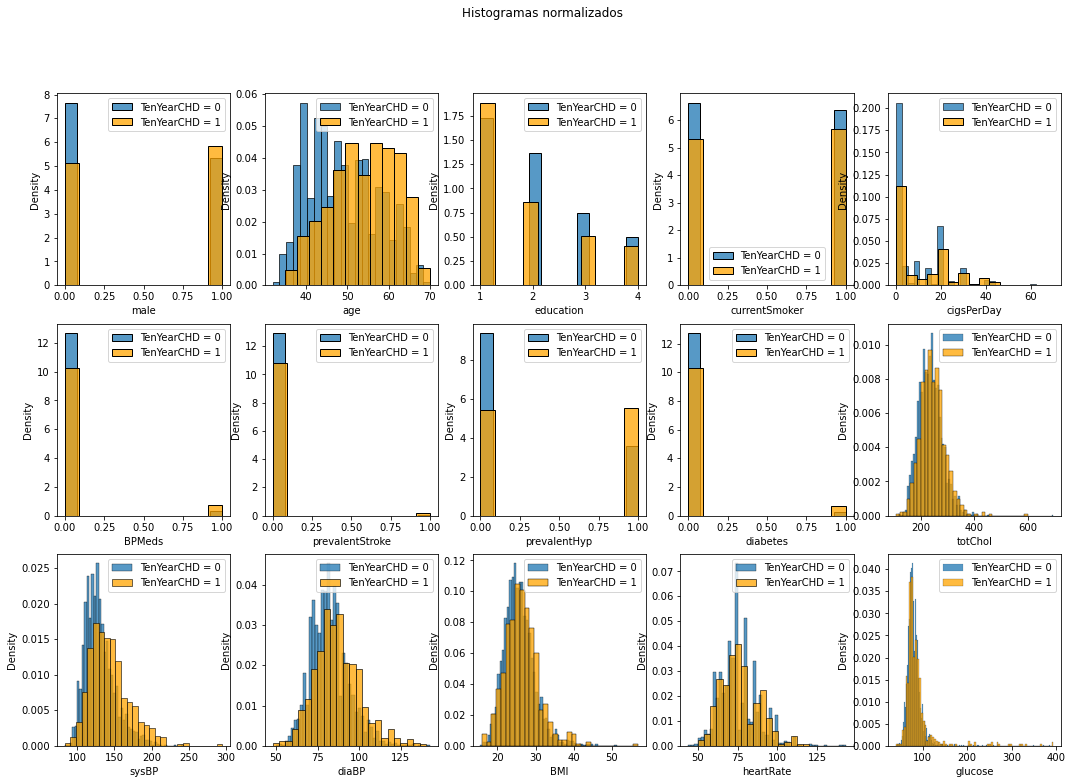

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df.columns[:-1], axes.flatten()):
    sns.histplot(data = df.loc[df['TenYearCHD']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = df.loc[df['TenYearCHD']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])

<AxesSubplot:>

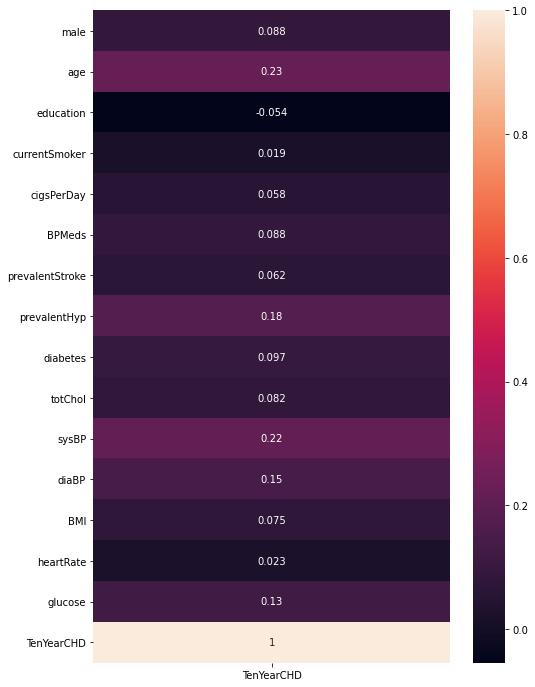

In [12]:
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['TenYearCHD']], annot=True)

<a id="clf"></a>
### Clasificación de pacientes
Ahora utilizaremos una regresión logística como clasificador de personas y el objetivo será etiquetar a aquellas que tengan riesgo de padecer una enfermedad coronaria en los próximos 10 años.
<a id="prep"></a>
#### Preparación de los datos
¿Qué debemos hacer con el dataset antes de entrenar el modelo?

In [13]:
# Eliminamos los registros con valores faltantes ya que son sólo un 13% del dataset
df.dropna(inplace=True)

In [14]:
# Preparamos la matriz de features y el vector objetivo
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [15]:
# Separamos un set de testeo para evaluar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [16]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.15238789646372586, 0.15191256830601094)

In [17]:
# Estandarizamos los datos para que la regularización sea correcta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

<a id="fit"></a>
#### Ajuste del modelo

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

<a id="eval"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance y ver si podemos hacer algo para mejorarlo

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_score(y_train, lr.predict(X_train_std))

0.8541742617572001

Text(33.0, 0.5, 'Reales')

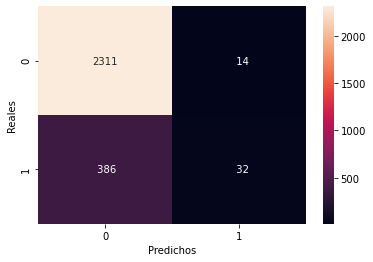

In [21]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Observamos que hay una accuracy del 85%, pero que de los 418 casos positivos, sólo 32 (7.6%) están siendo detectados. Esto implica que nuestro clasificador le está diciendo a mucha gente que está fuera de peligro cuando en realidad no es así. Intentemos modificar el modelo para mejorar la predicción en estos casos

<a id="opt"></a>
#### Optimización del modelo

In [22]:
lr.predict_proba(X_train_std[y_train==0])[:,1]

array([0.13013765, 0.0262662 , 0.03492299, ..., 0.05835754, 0.24522372,
       0.17347683])

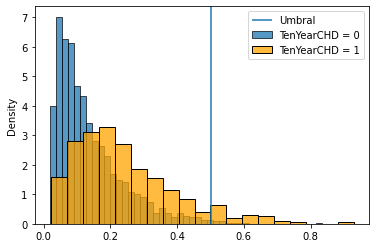

In [23]:
# Histograma de probabilidades
sns.histplot(data = lr.predict_proba(X_train_std[y_train==0])[:,1], stat = 'density')
sns.histplot(data = lr.predict_proba(X_train_std[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

Dada la naturaleza del probelma, conviene utilizar una estrategia que impida clasificar como pacientes sanos a aquellos que están en riesgo.

In [24]:
umbral = 0.2
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > umbral

In [25]:
accuracy_score(y_train, y_pred_train)

0.7542836310608823

Text(33.0, 0.5, 'Reales')

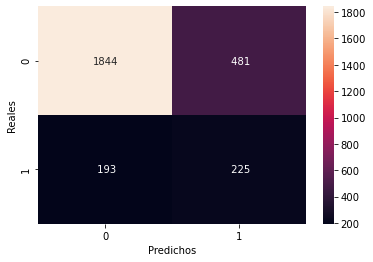

In [26]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Modificando el umbral de decisión, baja considerablemente la exactitud del modelo, pero ahora detecta correctamente 225 (53.8%) de los casos positivos 